# Faster R-CNN으로 Truck과 Bus 탐지하기

## 1. Bus-Truck 데이터셋 살펴보기

In [2]:
import os
import pandas as pd

In [3]:
from utils import CLASS_NAME_TO_ID, visualize

In [4]:
CLASS_NAME_TO_ID

{'Bus': 0, 'Truck': 1}

In [5]:
data_dir = "D:/project/Object_detection/DRIVING-DATASET/Detection"
data_df = pd.read_csv(os.path.join(data_dir, "df.csv"))

In [6]:
print(data_df.columns)

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')


In [7]:
index = 0
image_files = [x for x in os.listdir("DRIVING-DATASET/Detection/images/") if x.endswith(".jpg")]
image_file = image_files[index]
image_file

'0000599864fd15b3.jpg'

In [8]:
image_path = os.path.join("DRIVING-DATASET/Detection/images", image_file)

In [9]:
image_path

'DRIVING-DATASET/Detection/images\\0000599864fd15b3.jpg'

In [10]:
import cv2
import matplotlib.pyplot as plt

In [11]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
image

array([[[ 80,  87,  80],
        [ 86,  93,  86],
        [ 93,  95,  94],
        ...,
        [ 93,  91,  94],
        [ 77,  78,  82],
        [121, 125, 128]],

       [[ 79,  83,  82],
        [ 76,  80,  79],
        [ 79,  83,  84],
        ...,
        [ 82,  80,  83],
        [ 92,  93,  95],
        [121, 125, 126]],

       [[ 74,  74,  82],
        [ 68,  71,  78],
        [ 71,  74,  79],
        ...,
        [ 85,  83,  84],
        [ 98, 100,  99],
        [116, 122, 120]],

       ...,

       [[106, 102,  99],
        [108, 104, 101],
        [108, 104, 101],
        ...,
        [165, 157, 144],
        [150, 142, 129],
        [133, 125, 112]],

       [[108, 103,  99],
        [103,  98,  94],
        [111, 108, 103],
        ...,
        [166, 160, 148],
        [160, 154, 142],
        [151, 145, 133]],

       [[117, 112, 108],
        [116, 111, 107],
        [122, 119, 114],
        ...,
        [173, 167, 155],
        [165, 159, 147],
        [162, 156, 144]]

In [13]:
print(image.shape)

(170, 256, 3)


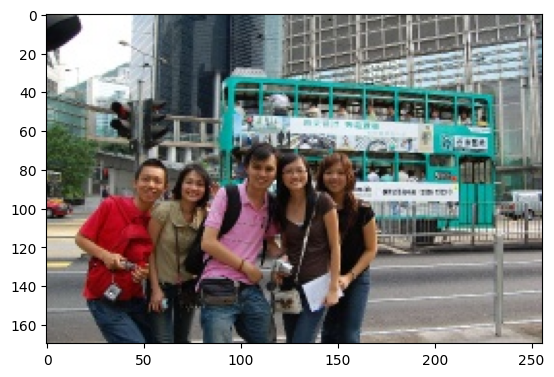

In [14]:
plt.imshow(image)

In [15]:
image_id = image_file.split(".")[0]

In [16]:
image_id

'0000599864fd15b3'

In [17]:
meta_data = data_df[data_df["ImageID"] == image_id]

In [18]:
meta_data

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.34375,0.90875,0.156162,0.650047,1,0,...,0,0,0.421875,0.34375,0.795,0.90875,0.156162,0.5127,0.650047,0.457197


In [19]:
cate_names = meta_data["LabelName"].values

In [20]:
cate_names

array(['Bus'], dtype=object)

In [21]:
bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values

In [22]:
bboxes

array([[0.34375 , 0.90875 , 0.156162, 0.650047]])

In [23]:
CLASS_NAME_TO_ID

{'Bus': 0, 'Truck': 1}

In [24]:
img_h, img_w, img_c = image.shape
class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]

In [25]:
class_ids

[0]

In [26]:
unnorm_bboxes = bboxes.copy()
unnorm_bboxes[:,[1,2]] = unnorm_bboxes[:,[2,1]]
unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2] # w, h = xmax-xmin, ymax-ymin
unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4]/2) # xmin, ymin -> x_cen, y_cen = x_min + w/2, y_min + h/2

# x_center, y_center, w, h
unnorm_bboxes[:, [0,2]] *= img_w
unnorm_bboxes[:, [1,3]] *= img_h

In [27]:
canvas = visualize(image, unnorm_bboxes, class_ids)

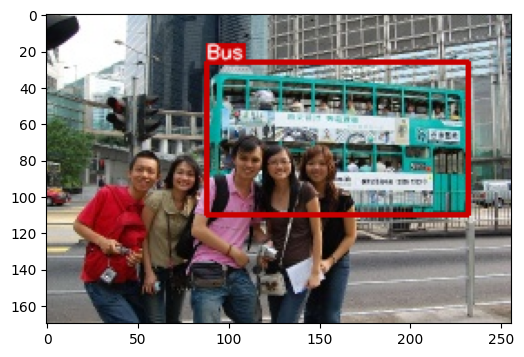

In [28]:
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [29]:
from ipywidgets import interact

In [30]:
@interact(index=(0, len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join("DRIVING-DATASET/Detection/images", image_file)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_id = image_file.split(".")[0]
    meta_data = data_df[data_df['ImageID'] == image_id]
    cate_names = meta_data['LabelName'].values
    bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values

    img_h, img_w, _ = image.shape

    class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]

    unnorm_bboxes = bboxes.copy()
    unnorm_bboxes[:,[1,2]] = unnorm_bboxes[:,[2,1]]
    unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2] # w, h = xmax-xmin, ymax-ymin
    unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4]/2) # xmin, ymin -> x_cen, y_cen = x_min + w/2, y_min + h/2

    # x_center, y_center, w, h
    unnorm_bboxes[:, [0,2]] *= img_w
    unnorm_bboxes[:, [1,3]] *= img_h

    canvas = visualize(image, unnorm_bboxes, class_ids)

    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=15223), Output()), _dom_classes=('widget-int…

# 2. Object detection 데이터셋 구축과 연산을 위한 텐서변환 모듈 작성하기

In [31]:
import torch
import numpy as np

In [32]:
class Detection_dataset():
    def __init__(self, data_dir, phase, transformer=None):

        self.data_dir = data_dir
        self.phase = phase
        self.data_df = pd.read_csv(os.path.join(self.data_dir, "df.csv"))
        self.image_files = [x for x in os.listdir(os.path.join(self.data_dir, phase)) if x.endswith('jpg')]
        self.transformer = transformer

    def __len__(self):
        return len(self.image_files)
    
    
    def __getitem__(self, index):
        # input : image
        # target : label (box, class_id)    
        # get_image -> filename(imageid) -> get_label
        filename, image = self.get_image(index)
        bboxes, class_ids = self.get_label(filename)
        img_h, img_w, _ = image.shape

        if self.transformer:
            image = self.transformer(image)
            _, img_h, img_w = image.shape

        bboxes[:, [0,2]] *= img_w
        bboxes[:, [1,3]] *= img_h
        # bboxes = [[xmin, ymin, xmax, ymax]] -> [0,2] : xmin, xmax / [1, 3] : ymin, ymax

        target = {}
        target['boxes'] = torch.Tensor(bboxes).float()
        target['labels'] = torch.Tensor(class_ids).float()

        return image, target, filename

    def get_image(self, index):
        filename = self.image_files[index]
        image_path = os.path.join(self.data_dir, self.phase, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        return filename, image
    
    def get_label(self, filename):
        image_id = filename.split('.')[0]
        meta_data = self.data_df[self.data_df['ImageID'] == image_id]
        cate_names = meta_data['LabelName'].values
        class_ids = np.array([CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names])
        bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values
        bboxes[:, [1,2]] = bboxes[:, [2,1]]
        return bboxes, class_ids

In [33]:
data_dir = "DRIVING-DATASET/Detection"
dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=None)

In [34]:
len(dataset)

13703

In [35]:
image, target, filename = dataset[0]

In [36]:
image.shape # h, w, c

(170, 256, 3)

In [37]:
target

{'boxes': tensor([[ 88.0000,  26.5475, 232.6400, 110.5080]]),
 'labels': tensor([0.])}

In [38]:
filename

'0000599864fd15b3.jpg'

In [39]:
dataset.data_df.iloc[0]

ImageID        0000599864fd15b3
Source                   xclick
LabelName                   Bus
Confidence                    1
XMin                    0.34375
XMax                    0.90875
YMin                   0.156162
YMax                   0.650047
IsOccluded                    1
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
XClick1X               0.421875
XClick2X                0.34375
XClick3X                  0.795
XClick4X                0.90875
XClick1Y               0.156162
XClick2Y                 0.5127
XClick3Y               0.650047
XClick4Y               0.457197
Name: 0, dtype: object

In [40]:
0.34375 * 256

88.0

In [41]:
0.90875 * 256

232.64

In [42]:
0.156162 * 170

26.547539999999998

In [43]:
0.650047 * 170

110.50799

In [44]:
index = 1
image, target, filename = dataset[index]

In [45]:
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()

n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

In [46]:
bboxes

array([[124.693375,  49.210495, 107.733246,  50.275635],
       [217.81339 ,  52.192978,  75.94676 ,  34.937214]], dtype=float32)

In [47]:
canvas = visualize(image, bboxes, class_ids)

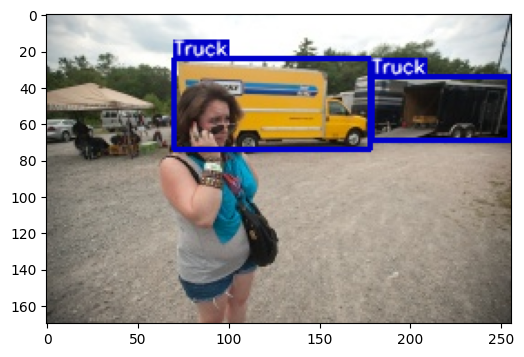

In [48]:
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [49]:
@interact(index=(0, len(dataset)-1))
def show_sample(index=0):
    image, target, filename = dataset[index]
    boxes = target['boxes'].numpy()
    class_ids = target['labels'].numpy()

    n_obj = boxes.shape[0]
    bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
    bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
    bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

    canvas = visualize(image, bboxes, class_ids)

    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=13702), Output()), _dom_classes=('widget-int…

In [50]:
from torchvision import transforms

In [51]:
IMAGE_SIZE = 448

transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [52]:
transformer

Compose(
    ToTensor()
    Resize(size=(448, 448), interpolation=bilinear, max_size=None, antialias=None)
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [53]:
data_dir = "DRIVING-DATASET/Detection/"
transformed_dataset = Detection_dataset(data_dir, phase="train", transformer=transformer)

In [54]:
from torchvision.utils import make_grid

In [55]:
index = 8
image, target, filename = transformed_dataset[index]

In [56]:
image.shape

torch.Size([3, 448, 448])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


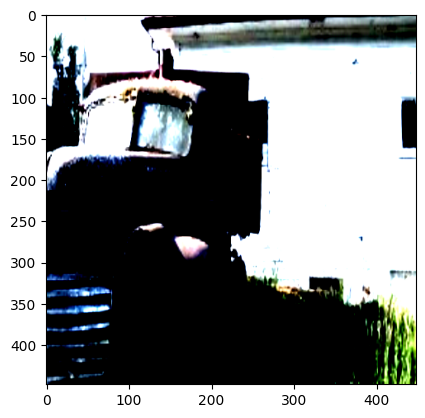

In [57]:
plt.imshow(image.permute(1,2,0).numpy())

In [58]:
np_image = make_grid(image, normalize=True).permute(1,2,0).numpy()

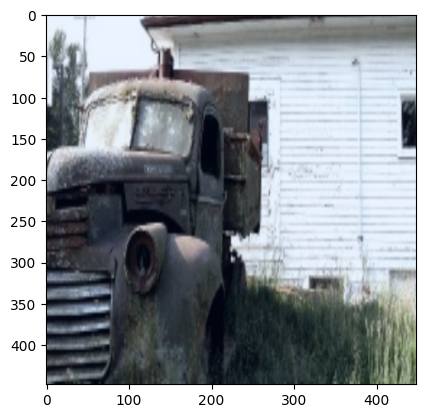

In [59]:
plt.imshow(np_image)

In [60]:
np_image = make_grid(image, normalize=True).permute(1,2,0).numpy()
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()

In [61]:
n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

In [62]:
canvas = visualize(np_image, bboxes, class_ids)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


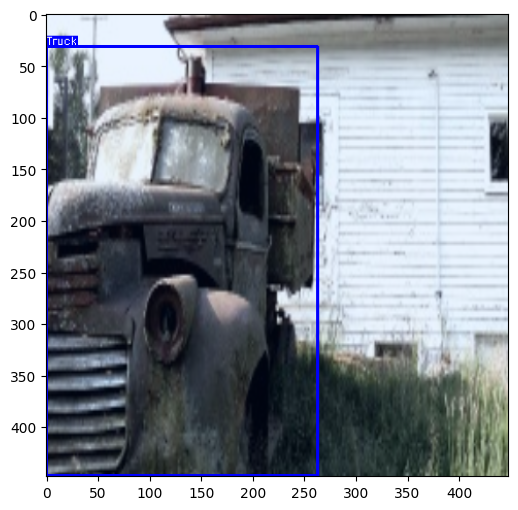

In [63]:
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [64]:
canvas.shape

(448, 448, 3)

In [65]:
from torch.utils.data import DataLoader

In [66]:
def collate_fn(batch):
    image_list = []
    target_list = []
    filename_list = []

    for a, b, c in batch:
        image_list.append(a)
        target_list.append(b)
        filename_list.append(c)

    return image_list, target_list, filename_list

In [67]:
data_dir = "DRIVING-DATASET/Detection"
BATCH_SIZE = 6

trainset = Detection_dataset(data_dir, phase="train", transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [68]:
for index, batch in enumerate(trainloader):
    images = batch[0]
    target = batch[1]
    filenames = batch[2]

    if index == 0:
        break

In [69]:
target

[{'boxes': tensor([[120.6800,  37.7068, 352.2400, 411.7868]]),
  'labels': tensor([0.])},
 {'boxes': tensor([[  7.9332,  26.1332, 435.4000, 422.4891],
          [ 18.2000,  26.7555, 427.9332, 421.8668]]),
  'labels': tensor([0., 1.])},
 {'boxes': tensor([[110.3200,  63.9009, 433.7200, 434.1084]]),
  'labels': tensor([0.])},
 {'boxes': tensor([[ 32.8998,  16.8000, 448.0000, 448.0000]]),
  'labels': tensor([1.])},
 {'boxes': tensor([[100.2400, 128.8000, 430.0800, 371.4668]]),
  'labels': tensor([1.])},
 {'boxes': tensor([[ 93.1002, 184.9044, 118.6501, 224.2460],
          [116.9002, 185.3963, 134.7499, 226.7046],
          [133.0000, 175.5609, 164.8501, 234.0813],
          [161.3499, 173.5937, 227.1499, 243.9167],
          [225.0501, 171.1351, 289.4501, 233.5894],
          [238.6998, 137.6950, 404.9499, 281.2907],
          [330.7499, 162.7750, 447.6501, 191.2973]]),
  'labels': tensor([0., 0., 0., 0., 0., 0., 0.])}]

In [70]:
filenames

['b7024b5d4429265f.jpg',
 'aeb5003c9247901f.jpg',
 '1aac470e34d273f3.jpg',
 'dc5c86977c783f3a.jpg',
 '09feecbc4f018b2c.jpg',
 '206b45a62652b561.jpg']

In [72]:
def build_dataloader(data_dir, batch_size = 4, image_size=448):
    transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(size=(image_size, image_size)),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    dataloaders = {}
    train_dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)
    dataloaders["train"] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    val_datset = Detection_dataset(data_dir=data_dir, phase="val", transformer=transformer)
    dataloaders["val"] = DataLoader(val_datset, batch_size = 1, shuffle = False, collate_fn=collate_fn)

    return dataloaders

In [76]:
data_dir = "DRIVING-DATASET/Detection/"
dloaders = build_dataloader(data_dir, batch_size=4, image_size=448)

for phase in ["train", "val"]:
    for index, batch in enumerate(dloaders[phase]):
        images, targets, filenames = batch
        
        print(f"{phase} - {targets}")
        print(f"{phase} - {filenames}")

        if index == 0:
            break

train - [{'boxes': tensor([[ 40.6000,  19.3321, 340.7600, 423.6248]]), 'labels': tensor([0.])}, {'boxes': tensor([[ 10.0800,   4.8738, 434.2800, 434.8785]]), 'labels': tensor([1.])}, {'boxes': tensor([[173.0400, 268.1276, 247.8000, 360.1651],
        [261.5200, 300.4879, 328.7200, 397.1484]]), 'labels': tensor([1., 1.])}, {'boxes': tensor([[391.4400, 136.6400, 447.7200, 255.3600]]), 'labels': tensor([1.])}]
train - ['4b893390f27102c8.jpg', 'dd20fad62dbf661c.jpg', '21e56947aa6c2595.jpg', '3879cf98ede5b5c2.jpg']
val - [{'boxes': tensor([[ 80.9200, 186.5965, 303.5200, 393.7862]]), 'labels': tensor([1.])}]
val - ['e4527471d9fb72a6.jpg']


# 3. Faster R-CNN 아키텍처 불러오기

In [78]:
from torchvision import models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [79]:
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

c:\Users\tfg00\anaconda3\envs\FastCampus\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tfg00\anaconda3\envs\FastCampus\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\tfg00/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100.0%


In [80]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [81]:
in_features = model.roi_heads.box_predictor.cls_score.in_features

In [82]:
num_classes = 2
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [83]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [85]:
def build_model(num_classes):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [86]:
NUM_CLASSES = 2
model = build_model(num_classes=NUM_CLASSES)

c:\Users\tfg00\anaconda3\envs\FastCampus\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tfg00\anaconda3\envs\FastCampus\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
